In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
df = pd.read_csv("C:/Users/KE/Desktop/RI.csv")
df.head()

,ID,Recipe,Ingredients
0,0,"Basil, Roasted Peppers and Monterey Jack Cornb...",unsalted butter
1,1,Crispy Cheese Twists,parmesan cheese
2,2,Mom's Yeast Rolls,hot water
3,3,Sweet Potato Bread I,white sugar
4,4,Orange Buns,butter


In [3]:
print(len(df['Recipe'].unique()))
print(len(df['Ingredients'].unique()))

100
175


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


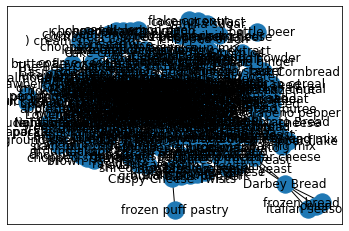

In [11]:
g = nx.from_pandas_edgelist(df, source = 'Recipe', target = 'Ingredients')

nx.draw_networkx(g)

In [5]:
#for i, elrow in df.iterrows():
#    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [12]:
#len(g.edges())
#g.edges()

In [16]:
g.add_nodes_from(nodes_for_adding=df.Recipe.tolist())
#len(g.nodes())
#g.nodes()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


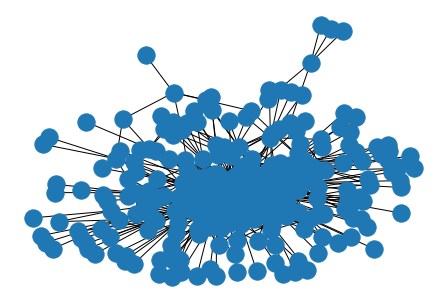

In [18]:
nx.draw(g)

In [44]:
from bokeh.io import show, output_notebook, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool, TapTool, BoxSelectTool, WheelZoomTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4



plot = Plot(plot_width=800, plot_height=800, x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Food Graph Interaction"

graph_renderer = from_networkx(g, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[1])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[2])

graph_renderer.edge_renderer.glyph = MultiLine(line_color=Spectral4[0], line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[1], line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[2], line_alpha=0.8, line_width=1)

#source = ColumnDataSource(data=dict('Recipe'=df['Recipe'], 'Ingredients'=df['Ingredients']))

graph_renderer.selection_policy = NodesAndLinkedEdges()
#graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)
Tooltips = [("Recipe", "@index")]
plot.add_tools(HoverTool(tooltips = Tooltips), TapTool(), BoxSelectTool(), BoxZoomTool(), WheelZoomTool(), ResetTool())

output_notebook()
output_file("output.html")
show(plot)


Loading BokehJS ...